# Where to Open An Italian Restaurant In Boston

### Applied Data Science Capstone by IBM/Coursera

## Introduction to a Business Problem

Boston is a city with many neighborhoods that have different characteristics about them. Some areas are well known for their specific cultures and while others are know for their eliteness. Given these differences, how would someone who is looking to open a restaurant somewhere in Boston pick a location? Also, what type of restaurant should be chosen?  Entrepeneurs open up restaurants all the time but one of the biggest problems is picking the wrong location. If you pick a spot where most people don't like a certain type of restaurant, then you won't do well. Picking the correct area will be vital in running a successful restaurant.

The goal here is to find a neighborhood with restaurants with a lot of likes(people like going out to restaurants in the area) but not in an overcrowded area. Areas where there is not restaurants will not be favorable as people most likely don't like to go out to eat in those areas.

## Data

First, I need to figure out all the neighborhoods in Boston. Using https://data.boston.gov/dataset/zoning-districts, I was able to retreive all the names of the neighborhoods. From there, I need to find the locations of each neighborhood. I used the geocoder API to retreive this information. From there, I used the Foursqare API to retreive information about all the restaurants in each neighborhood and all the likes received for each restaurant. With this data, I will use the location and number of likes to cluster the data into tiers so the location of the restaurant can be chosen on the neighborhoods in the best tier.

I am going to use how crowded a neighborhood with restaurants and how many likes each restaurant receives as my statistics to decide where to open up the restaurant.

## Acquiring the Data

Download the csv from the data.boston.gov website and create a dataframe of just the neighborhood names

In [607]:
import pandas as pd
import requests
file_path = ('./SourceData/boston_data.csv')
df = pd.read_csv(file_path)

Neighborhoods = df[['Name']]


For each Neighborhood, find the longitude and latitude via the geocode API. Store the results in a dataframe.

In [608]:
VERSION = '20180605'
LIMIT = 30

def getHoodLocations(names):
    latlong=[]
    for hood in names:
            print(hood)
            latitude, longitude = geocoder.komoot(hood+' , Boston, Massachusetts').latlng
            latlong.append([(
                hood,
                latitude,
                longitude)])
            
    nearby_venues = pd.DataFrame([item for venue_list in latlong for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Latitude', 
                  'Longitude']
    
    return(nearby_venues)

In [609]:
boston_hoods = getHoodLocations(names=Neighborhoods['Name'])

Roslindale
Jamaica Plain
Mission Hill
Longwood
Bay Village
Leather District
Chinatown
North End
Roxbury
South End
Back Bay
East Boston
Charlestown
West End
Beacon Hill
Downtown
Fenway
Brighton
West Roxbury
Hyde Park
Mattapan
Dorchester
South Boston Waterfront
South Boston
Allston
Harbor Islands


After creating an account with the Foursquare API, use the credentials to perform the Explore Request. The function getNearbyVenues will retreive all the venues within the neighborhood and store it as a dataframe

In [434]:
CLIENT_ID = 'ZL41UQYBWXKZGKOK35AJ0LJ1EJSID3QTEHZ0H02YBESXINIQ'
CLIENT_SECRET = 'HP55JDFG2UNXTGTECHOWDQGIGUERKOQTG2L3DF3RYN5CM0FT'
VERSION = '20180605'

LIMIT = 1000
def getNearbyVenues(names, latitudes, longitudes, radius=350):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue ID',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [435]:
boston_venues = getNearbyVenues(names=boston_hoods['Neighborhood'],
                                   latitudes=boston_hoods['Latitude'],
                                   longitudes=boston_hoods['Longitude']
                                  )

Roslindale
Jamaica Plain
Mission Hill
Longwood
Bay Village
Leather District
Chinatown
North End
Roxbury
South End
Back Bay
East Boston
Charlestown
West End
Beacon Hill
Downtown
Fenway
Brighton
West Roxbury
Hyde Park
Mattapan
Dorchester
South Boston Waterfront
South Boston
Allston
Harbor Islands


## Exploratory Data Analysis

In [436]:
import re
import matplotlib.pyplot as plt
import matplotlib.pyplot as figure

Since I am only looking for restaurants, I excluded any venues that aren't restaurants. Then, I created bar chart to compare the quantities of each restaurant category

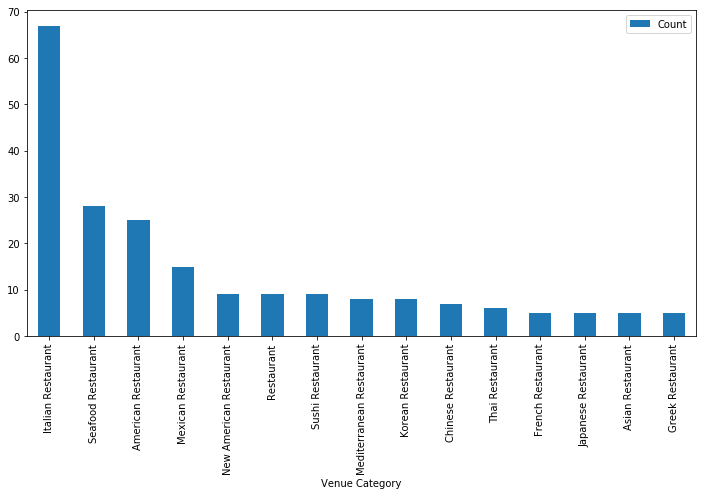

In [610]:
restaurants = boston_venues[boston_venues['Venue Category'].str.match('.*Restaurant.*')]

restaurants_sorted = restaurants.groupby(['Venue Category'])['Neighborhood'].count().to_frame().sort_values(['Neighborhood'],ascending=False).rename(columns={"Neighborhood": "Count"})
restaurants_sorted.head(15).plot(kind='bar', figsize=(12,6))


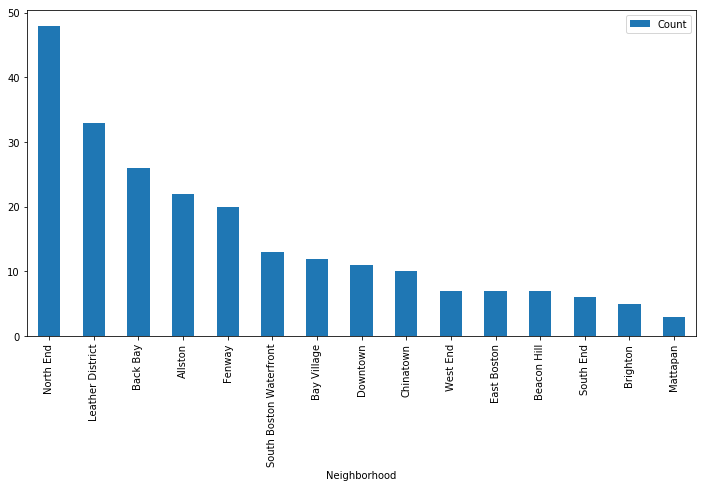

In [647]:
Neighborhood_sorted = restaurants.groupby(['Neighborhood'])['Neighborhood'].count().to_frame().sort_values(['Neighborhood'],ascending=False).rename(columns={"Neighborhood": "Count"})
Neighborhood_sorted.head(15).plot(kind='bar', figsize=(12,6))

In [648]:
Neighborhood_sorted.reset_index(level=0, inplace=True)
Neighborhood_sorted = Neighborhood_sorted[['Neighborhood','Count']]
Neighborhood_sorted.rename(columns={'Count': 'Restaurant Count per Neighborhood'}, inplace=True)

Seeing Italian is very popular in Boston, I took a deeper dive into Italian food. I created a bar chart to show quantity of Italian Restaurants per neighborhood

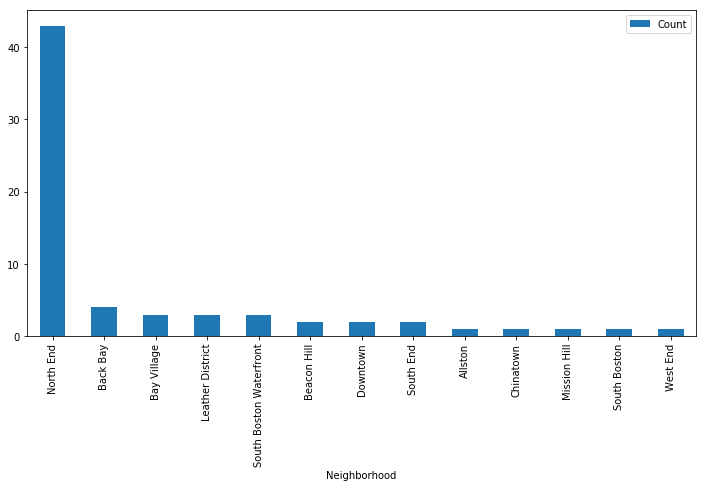

In [650]:
itl_restaurants = boston_venues[boston_venues['Venue Category'].str.match('.*Italian Restaurant.*')]
itl_restaurants_sorted = itl_restaurants.groupby(['Neighborhood'])['Neighborhood'].count().to_frame().sort_values(['Neighborhood'],ascending=False).rename(columns={"Neighborhood": "Count"})

itl_restaurants_sorted.head(15).plot(kind='bar', figsize=(12,6))

In [651]:
itl_restaurants_sorted.reset_index(level=0, inplace=True)
itl_restaurants_sorted = itl_restaurants_sorted[['Neighborhood','Count']]
itl_restaurants_sorted.rename(columns={'Count': 'Italian Restaurant Count per Neighborhood'}, inplace=True)

In [652]:
itl_restaurants_sorted

,Neighborhood,Italian Restaurant Count per Neighborhood
0,North End,43
1,Back Bay,4
2,Bay Village,3
3,Leather District,3
4,South Boston Waterfront,3
5,Beacon Hill,2
6,Downtown,2
7,South End,2
8,Allston,1
9,Chinatown,1


In [657]:
Italian_counts = pd.merge(itl_restaurants_sorted, Neighborhood_sorted, how='inner', on = 'Neighborhood')
Italian_counts['Percent Italian Restaurants'] = Italian_counts['Italian Restaurant Count per Neighborhood']/Italian_counts['Restaurant Count per Neighborhood']
Italian_counts.sort_values(['Percent Italian Restaurants'],ascending=False)

,Neighborhood,Italian Restaurant Count per Neighborhood,Restaurant Count per Neighborhood,Percent Italian Restaurants
0,North End,43,48,0.895833
7,South End,2,6,0.333333
10,Mission Hill,1,3,0.333333
11,South Boston,1,3,0.333333
5,Beacon Hill,2,7,0.285714
2,Bay Village,3,12,0.250000
4,South Boston Waterfront,3,13,0.230769
6,Downtown,2,11,0.181818
1,Back Bay,4,26,0.153846
12,West End,1,7,0.142857


Based on the results, it is safe to assume the North End is overcrowded with Italian Restaurants(Not a surpise if you are from Boston). I will use 40% or lower as my benchmark and only the North End is over that mark. To move forward, I remove all Italian Restaurants from the North End from the dataset as they are outliers.

In [665]:
non_north_itl = itl_restaurants.loc[itl_restaurants['Neighborhood'] != 'North End']

There was restaurant found in 2 different Neighborhoods so I figured out the correct neighborhood and removed the inccorect row

In [666]:
non_north_itl = non_north_itl[(non_north_itl['Neighborhood'] != 'Downtown') | (non_north_itl['Venue ID'] != '4e4c3347bd413c4cc667ac27')]

Merge the Italian Restaurant Counts and Restaurant Counts per Neighborhood to the original dataset

In [667]:
non_north_itl = pd.merge(non_north_itl, Italian_counts, how='inner', on = 'Neighborhood')
non_north_itl

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category,Italian Restaurant Count per Neighborhood,Restaurant Count per Neighborhood,Percent Italian Restaurants
0,Mission Hill,42.333176,-71.099093,Lilly's Gourmet Pasta Express,4c599ad92091a593c9475dd0,42.332445,-71.100046,Italian Restaurant,1,3,0.333333
1,Bay Village,42.349494,-71.066749,Maggiano's Little Italy,40b28c80f964a5200ff81ee3,42.350966,-71.068695,Italian Restaurant,3,12,0.250000
2,Bay Village,42.349494,-71.066749,davio's,5568f89f498e12c9d5dc83ea,42.350388,-71.070204,Italian Restaurant,3,12,0.250000
3,Bay Village,42.349494,-71.066749,Da Vinci,4ad5cd72f964a5208f0321e3,42.349546,-71.070850,Italian Restaurant,3,12,0.250000
4,Leather District,42.358789,-71.057054,Casa Razdora,4d1a255481cea35d5867faec,42.358231,-71.054741,Italian Restaurant,3,33,0.090909
5,Leather District,42.358789,-71.057054,Pavia - Italian Cuisine & Catering,4ca216f746978cfa5aa1c17f,42.357752,-71.055913,Italian Restaurant,3,33,0.090909
6,Leather District,42.358789,-71.057054,Cafe Artigiano,58541f39ce593d53043e55d0,42.358025,-71.059050,Italian Restaurant,3,33,0.090909
7,Chinatown,42.355041,-71.066051,Teatro,4a4b7a0df964a52067ac1fe3,42.353026,-71.064371,Italian Restaurant,1,10,0.100000
8,South End,42.341310,-71.077230,Giacomo's,3fd66200f964a52021ec1ee3,42.343952,-71.077646,Italian Restaurant,2,6,0.333333
9,South End,42.341310,-71.077230,Mida,583f619e5804ea67b5d90bae,42.339294,-71.080481,Italian Restaurant,2,6,0.333333


For each Italian Restaurant, I use the FourSquare API to find the number of likes for each restaurant 

In [507]:
def getItalianRatings(venue, VENUE_ID):
    
    venues_list=[]
    for ven, ven_id in zip(venue, VENUE_ID):
           
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/'+ven_id+'?&client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
        # make the GET request
        results = requests.get(url).json()["response"]
        
        # return only relevant information for each nearby venue
        venues_list.append([
            ven_id,
            results['venue']['likes']['count']
            ])

    itl_venues_frame = pd.DataFrame(venues_list)
    itl_venues_frame.columns = ['Venue ID',
                  'Venue Likes Count']
    
    return(itl_venues_frame)

In [510]:
itl_venues = getItalianRatings(venue = non_north_itln['Venue'], VENUE_ID = non_north_itln['Venue ID'])

KeyError: 'venue'

Join the new dataset with likes per restaurant with the original dataset

In [679]:
Itl_cmbnd = pd.merge(itl_venues, non_north_itl, how='inner', left_on = 'Venue ID', right_on = 'Venue ID')

Create clusters based on number of likes per restaurant, number of restaurants in the neighborhood, number of Italian restaurants in the neighborhood. I did not standardize the wieghts because I felt number of likes is much more important than number of restaurants/Italian Restaurants

In [680]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

kclusters = 4

Itl_cmbnd_prep = Itl_cmbnd.drop(['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue Category','Venue','Venue ID', 'Venue Latitude', 'Venue Longitude', 'Percent Italian Restaurants'], 1)


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Itl_cmbnd_prep)

# check cluster labels generated for each row in the dataframe
clusters = pd.DataFrame(kmeans.labels_[0:24])

df = pd.concat([clusters.reset_index(drop=True),Itl_cmbnd.reset_index(drop=True)], axis=1)

df.rename(columns={"0": "Cluster"})

Itl_cmbnd = df.rename(columns={0: "Cluster"})

In [682]:
Itl_cmbnd

,Cluster,Venue ID,Venue Likes Count,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Italian Restaurant Count per Neighborhood,Restaurant Count per Neighborhood,Percent Italian Restaurants
0,1,4c599ad92091a593c9475dd0,23,Mission Hill,42.333176,-71.099093,Lilly's Gourmet Pasta Express,42.332445,-71.100046,Italian Restaurant,1,3,0.333333
1,0,40b28c80f964a5200ff81ee3,239,Bay Village,42.349494,-71.066749,Maggiano's Little Italy,42.350966,-71.068695,Italian Restaurant,3,12,0.250000
2,3,5568f89f498e12c9d5dc83ea,63,Bay Village,42.349494,-71.066749,davio's,42.350388,-71.070204,Italian Restaurant,3,12,0.250000
3,1,4ad5cd72f964a5208f0321e3,36,Bay Village,42.349494,-71.066749,Da Vinci,42.349546,-71.070850,Italian Restaurant,3,12,0.250000
4,3,4d1a255481cea35d5867faec,52,Leather District,42.358789,-71.057054,Casa Razdora,42.358231,-71.054741,Italian Restaurant,3,33,0.090909
5,1,4ca216f746978cfa5aa1c17f,22,Leather District,42.358789,-71.057054,Pavia - Italian Cuisine & Catering,42.357752,-71.055913,Italian Restaurant,3,33,0.090909
6,1,58541f39ce593d53043e55d0,5,Leather District,42.358789,-71.057054,Cafe Artigiano,42.358025,-71.059050,Italian Restaurant,3,33,0.090909
7,3,4a4b7a0df964a52067ac1fe3,88,Chinatown,42.355041,-71.066051,Teatro,42.353026,-71.064371,Italian Restaurant,1,10,0.100000
8,2,3fd66200f964a52021ec1ee3,124,South End,42.341310,-71.077230,Giacomo's,42.343952,-71.077646,Italian Restaurant,2,6,0.333333
9,1,583f619e5804ea67b5d90bae,34,South End,42.341310,-71.077230,Mida,42.339294,-71.080481,Italian Restaurant,2,6,0.333333


Use the Folium and Matplotlib library to plot out all the Italian restaurants on the map. This maps helps give a visual representation of the spacing between current restaurants. The size of the bubble means the number of likes each restaurant has received. The color of the restaurants represents the clutser they are in.

In [687]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import matplotlib.cm as cm
import matplotlib.colors as colors
size = np.linspace(.1, 10, len(ys)+1)
clusters = np.linspace(1, 12, 12)

# create map
map_clusters = folium.Map(location=[42.3601, -71.0589], zoom_start=13)

# set color scheme for the clusters
x = np.arange(Itl_cmbnd['Venue Likes Count'].max())
ys = [i + x + (i*x)**2 for i in range(Itl_cmbnd['Venue Likes Count'].max())]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)+1))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, likes, ven, clus in zip(Itl_cmbnd['Venue Latitude'], Itl_cmbnd['Venue Longitude'], Itl_cmbnd['Neighborhood'], Itl_cmbnd['Venue Likes Count'], Itl_cmbnd['Venue'], Itl_cmbnd['Cluster']):
    label = folium.Popup(str(ven) +' - ' + str(poi) + ' Venue Likes Count ' + str(likes) + ' , Cluster - ' + str(clus), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=size[int(likes)],
        popup=label,
        color=rainbow[int(clus)],
        fill=True,
        fill_color=rainbow[int(likes-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Based on this intial visualization, Back Bay and Bay Village seems like the hot spots for the most liked Italian Restaurants. It seems the rest of the neighborhoods struggle to compete with those 2 neighborhoods

## Cluster 0

In [674]:
Itl_cmbnd.loc[Itl_cmbnd['Cluster'] == 0, Itl_cmbnd.columns[list(range(1, Itl_cmbnd.shape[1]))]]

,Venue ID,Venue Likes Count,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Italian Restaurant Count per Neighborhood,Restaurant Count per Neighborhood,Percent Italian Restaurants
1,40b28c80f964a5200ff81ee3,239,Bay Village,42.349494,-71.066749,Maggiano's Little Italy,42.350966,-71.068695,Italian Restaurant,3,12,0.25


## Cluster 1

In [675]:
Itl_cmbnd.loc[Itl_cmbnd['Cluster'] == 1, Itl_cmbnd.columns[list(range(1, Itl_cmbnd.shape[1]))]]

,Venue ID,Venue Likes Count,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Italian Restaurant Count per Neighborhood,Restaurant Count per Neighborhood,Percent Italian Restaurants
0,4c599ad92091a593c9475dd0,23,Mission Hill,42.333176,-71.099093,Lilly's Gourmet Pasta Express,42.332445,-71.100046,Italian Restaurant,1,3,0.333333
3,4ad5cd72f964a5208f0321e3,36,Bay Village,42.349494,-71.066749,Da Vinci,42.349546,-71.070850,Italian Restaurant,3,12,0.250000
5,4ca216f746978cfa5aa1c17f,22,Leather District,42.358789,-71.057054,Pavia - Italian Cuisine & Catering,42.357752,-71.055913,Italian Restaurant,3,33,0.090909
6,58541f39ce593d53043e55d0,5,Leather District,42.358789,-71.057054,Cafe Artigiano,42.358025,-71.059050,Italian Restaurant,3,33,0.090909
9,583f619e5804ea67b5d90bae,34,South End,42.341310,-71.077230,Mida,42.339294,-71.080481,Italian Restaurant,2,6,0.333333
13,5c79b27aa42362002c53c289,0,Back Bay,42.350707,-71.079730,Serafina Back Bay,42.349770,-71.082015,Italian Restaurant,4,26,0.153846
14,4b87dfe3f964a52086d031e3,21,West End,42.363919,-71.063899,Osteria Rustico,42.364397,-71.059870,Italian Restaurant,1,7,0.142857
16,4e4c3347bd413c4cc667ac27,18,Beacon Hill,42.359820,-71.066162,Antonio's Cucina Italiana,42.361152,-71.068327,Italian Restaurant,2,7,0.285714
18,5a189a9d6dcf042313c52cb4,20,South Boston Waterfront,42.354133,-71.048365,Tuscan Kitchen,42.352829,-71.047298,Italian Restaurant,3,13,0.230769
21,4b6eef62f964a520e5d12ce3,8,South Boston,42.333431,-71.049495,Alfredo's Italian Kitchen,42.332819,-71.051181,Italian Restaurant,1,3,0.333333


# Cluster 2

In [676]:
Itl_cmbnd.loc[Itl_cmbnd['Cluster'] == 2, Itl_cmbnd.columns[list(range(1, Itl_cmbnd.shape[1]))]]

,Venue ID,Venue Likes Count,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Italian Restaurant Count per Neighborhood,Restaurant Count per Neighborhood,Percent Italian Restaurants
8,3fd66200f964a52021ec1ee3,124,South End,42.341310,-71.077230,Giacomo's,42.343952,-71.077646,Italian Restaurant,2,6,0.333333
10,4a8583f7f964a52060fe1fe3,113,Back Bay,42.350707,-71.079730,Sorellina,42.348718,-71.077984,Italian Restaurant,4,26,0.153846
11,4a917cf2f964a520631a20e3,117,Back Bay,42.350707,-71.079730,Piattini Wine Cafe,42.349857,-71.081315,Italian Restaurant,4,26,0.153846
12,3fd66200f964a52043ec1ee3,157,Back Bay,42.350707,-71.079730,Papa Razzi,42.350806,-71.078588,Italian Restaurant,4,26,0.153846
15,4aa91accf964a520005220e3,105,Beacon Hill,42.359820,-71.066162,Grotto,42.359915,-71.062807,Italian Restaurant,2,7,0.285714
17,4aa433ebf964a520cf4520e3,147,Downtown,42.362918,-71.068737,Scampo at The Liberty Hotel,42.361937,-71.070513,Italian Restaurant,2,11,0.181818
19,552d878a498e769e0d39e867,152,South Boston Waterfront,42.354133,-71.048365,Babbo Pizzeria,42.354147,-71.045179,Italian Restaurant,3,13,0.230769
20,4c9a8cd1db10b60c19ad936d,121,South Boston Waterfront,42.354133,-71.048365,Strega Waterfront,42.353062,-71.045162,Italian Restaurant,3,13,0.230769


## Cluster 3

In [677]:
Itl_cmbnd.loc[Itl_cmbnd['Cluster'] == 3, Itl_cmbnd.columns[list(range(1, Itl_cmbnd.shape[1]))]].sort_values(by=['Venue Likes Count'])

,Venue ID,Venue Likes Count,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Italian Restaurant Count per Neighborhood,Restaurant Count per Neighborhood,Percent Italian Restaurants
22,4a8de631f964a520581120e3,48,Allston,42.355434,-71.132127,Carlo's Cucina Italiana,42.353026,-71.131135,Italian Restaurant,1,22,0.045455
4,4d1a255481cea35d5867faec,52,Leather District,42.358789,-71.057054,Casa Razdora,42.358231,-71.054741,Italian Restaurant,3,33,0.090909
2,5568f89f498e12c9d5dc83ea,63,Bay Village,42.349494,-71.066749,davio's,42.350388,-71.070204,Italian Restaurant,3,12,0.250000
7,4a4b7a0df964a52067ac1fe3,88,Chinatown,42.355041,-71.066051,Teatro,42.353026,-71.064371,Italian Restaurant,1,10,0.100000


Based on the results above, I come to the conclusion to recommend to start a restaurant in Back Bay. Back Bay only has an Italian Restaurant to Total Restaurant ratio of .15. This is really low as there are currently 26 restaurants in the area, but only 4 are Italian. So, there is definitely room for more Italian Restaurants in these areas. Looking at the likes, Back Bay has 3 Italian Restaurants in the 2nd best cluster and the last restaurant in the 3rd best cluster. This means these restaurants have received a lot of likes compared to other Italian Restaurants in other areas.

Although Bay Village has the only restaurant in the best cluster, this seems to be an outlier. Bay Village's 2 other restaurants are in the worst cluster and 3 best/2 worst cluster. So it seems it is not that easy to open an Italian Restaurant here. Also, 3 out of the 12 restaurants are Italian. This is much more crowded than Back Bay's 4 Italian Restaurants to 26 total restaurants.